In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
from scipy import stats # pip install scipy

In [80]:
df = pd.read_csv("03_returns/returns.csv", encoding = "UTF-8")
df_portfolio = pd.read_csv("03_returns/portfolio_returns.csv", encoding = "UTF-8")
df_ts = df[df["strategy"] == "ts"]
df_sd = df[df["strategy"].str.contains("sd")]

## Time-series strategy

#### Top 10 portfolios

In [81]:
df_portfolio.sort_values("return", ascending = False).head(10)

,strategy,prepare_interval,holding_interval,first_entry_time,last_exit_time,max_drawdown,return,standard_deviation,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
45,ts,360,120,1620928800000,1.688371e+12,-1.000000,5283.260727,0.006982,756533.390123,756524.615708,756602.220550
52,ts,360,60,1620928800000,1.688368e+12,-0.348875,9.744674,0.004371,1996.935525,1982.918849,2106.888585
46,ts,360,1440,1620950400000,1.688342e+12,-1.000000,-0.544513,0.008668,-180.078871,-187.142978,-124.632933
49,ts,360,30,1620928800000,1.688366e+12,-0.348875,-0.554266,0.002940,-534.304679,-555.145229,-370.822100
12,ts,1440,240,1621036800000,1.688357e+12,-1.000000,-0.590147,0.008679,-185.119738,-190.974041,-127.197977
9,ts,1440,120,1621036800000,1.688350e+12,-1.000000,-0.614335,0.006991,-233.278196,-240.546062,-161.370806
55,ts,5,1440,1620950400000,1.688342e+12,-1.000000,-0.616862,0.001532,-1066.145971,-1106.116031,-752.422316
37,ts,30,1440,1620950400000,1.688342e+12,-1.000000,-0.622079,0.002715,-603.424361,-625.974854,-426.426304
64,ts,60,1440,1620950400000,1.688342e+12,-1.000000,-0.626008,0.003809,-431.251302,-447.328987,-305.058100
1,ts,120,1440,1620950400000,1.688342e+12,-1.000000,-0.635629,0.005137,-321.616510,-333.537019,-228.052833


#### Scatter plot of each interval and the return

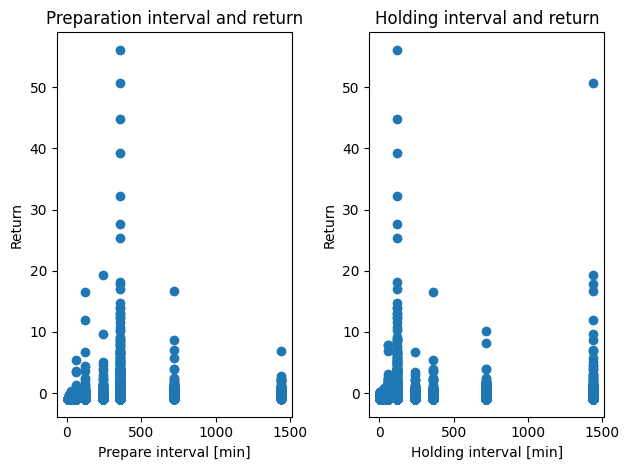

In [82]:
def draw_scatter_plot(position, title, first_column, second_column, xlabel, ylabel):
    plt.subplot(1, 2, position)
    plt.scatter(df_ts[first_column], df_ts[second_column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

draw_scatter_plot(1, "Preparation interval and return", "prepare_interval", "return", "Prepare interval [min]", "Return")
draw_scatter_plot(2, "Holding interval and return", "holding_interval", "return", "Holding interval [min]", "Return")

plt.tight_layout()
plt.show()

#### Top performing strategy %

In [126]:
print(str(df_ts.sort_values("return").tail(50)[(df_ts["prepare_interval"] == 360) &(df_ts["holding_interval"] == 120)].shape[0]) + " out of 50 best performing intervals are 360 and 120.")

34 out of 50 best performing intervals are 360 and 120.


C:\Users\cedric\AppData\Local\Temp\ipykernel_19648\2443567885.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(df_ts.sort_values("return").tail(50)[(df_ts["prepare_interval"] == 360) &(df_ts["holding_interval"] == 120)].shape[0]) + " out of 50 best performing intervals are 360 and 120.")


In [127]:
print(str(df_ts.sort_values("total_crypto_sharpe").tail(50)[(df_ts["prepare_interval"] == 360) &(df_ts["holding_interval"] == 120)].shape[0]) + " out of 50 best performing intervals are 360 and 120.")

43 out of 50 best performing intervals are 360 and 120.


C:\Users\cedric\AppData\Local\Temp\ipykernel_19648\3844302087.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(df_ts.sort_values("total_crypto_sharpe").tail(50)[(df_ts["prepare_interval"] == 360) &(df_ts["holding_interval"] == 120)].shape[0]) + " out of 50 best performing intervals are 360 and 120.")


#### Filtering by 6-hour prepare interval and 2-hour holding interval

In [111]:
df_ts_360_120 = df_ts[(df_ts["prepare_interval"] == 360) &(df_ts["holding_interval"] == 120)].sort_values("return")

In [113]:
df_ts_360_120[["max_drawdown", "return", "standard_deviation", "us_30d_tbill_sharpe", "sp500_sharpe", "total_crypto_sharpe"]].describe()

,max_drawdown,return,standard_deviation,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,-0.142373,3.580839,0.023162,93.138069,93.610909,108.435760
std,0.099540,6.949775,0.006556,255.985305,256.233175,256.773579
min,-1.000000,-1.000000,0.011973,-119.467951,-118.911595,-84.622773
25%,-0.169683,0.427923,0.019221,-28.291370,-27.343724,-12.436324
50%,-0.121337,1.237565,0.022743,9.149892,10.213348,28.300561
75%,-0.087746,3.795196,0.025767,117.886246,118.959794,126.410199
max,-0.019113,56.106917,0.072782,1811.098463,1811.285021,1821.552377


#### Grouping by prepare and holding interval

In [103]:
df_ts_grouped = df_ts.groupby(["prepare_interval", "holding_interval"]).agg({"max_drawdown": "min", "return": "mean", "us_30d_tbill_sharpe": "mean", "sp500_sharpe": "mean", "total_crypto_sharpe": "mean"})

In [131]:
df_ts_grouped.sort_values("return")

max_drawdown    return  \
prepare_interval holding_interval                           
5                1440                 -1.000000 -0.999942   
                 360                  -1.000000 -0.999860   
                 5                    -1.000000 -0.999763   
                 720                  -1.000000 -0.999747   
                 15                   -1.000000 -0.999382   
...                                         ...       ...   
1440             240                  -1.000000 -0.131210   
                 120                  -1.000000 -0.128121   
360              30                   -0.348875 -0.074021   
                 60                   -0.348875  0.494126   
                 120                  -1.000000  3.580839   

                                   us_30d_tbill_sharpe  sp500_sharpe  \
prepare_interval holding_interval                                      
5                1440                       -31.991370    -31.915608   
                 360                        -65.832210    -65.648988   
                 5                         -416.309466   -414.748465   
                 720                        -44.285691    -44.181856   
                 15                        -257.513014   -256.536595   
...                                                ...           ...   
1440             240                        -40.396055    -40.056293   
                 120                        -51.813290    -51.360864   
360              30                        -106.003819   -105.027524   
                 60                         -41.644290    -40.964428   
                 120                         93.138069     93.610909   

                                   total_crypto_sharpe  
prepare_interval holding_interval                       
5                1440                       -26.771795  
                 360                        -55.026417  
                 5                         -348.084472  
                 720                        -37.114105  
                 15                        -215.023511  
...                                                ...  
1440             240                        -29.164667  
                 120                        -37.421886  
360              30                         -74.807477  
                 60                         -19.668742  
                 120                        108.435760  

[81 rows x 5 columns]

In [84]:
df_ts[["max_drawdown", "return", "standard_deviation", "us_30d_tbill_sharpe", "sp500_sharpe", "total_crypto_sharpe"]].describe()

,max_drawdown,return,standard_deviation,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
count,17334.000000,17334.000000,17334.000000,17270.000000,17334.000000,17334.000000
mean,-0.252565,-0.611942,0.028245,-110.255696,-109.846915,-88.478928
std,0.215300,1.137146,0.023981,106.166609,107.692489,93.912846
min,-1.000000,-1.000000,0.000377,-725.794015,-2693.058674,-2634.495901
25%,-0.347961,-0.999977,0.011231,-150.388850,-149.682253,-120.312439
50%,-0.189367,-0.904795,0.021622,-76.284007,-75.858234,-60.626725
75%,-0.089178,-0.376683,0.038286,-41.690877,-41.457660,-32.270780
max,-0.004435,56.106917,0.456279,1811.098463,1811.285021,1821.552377


## Standard-deviation strategy

#### Grouping by sigma, prepare, and holding interval

In [114]:
df_sd_grouped = df_sd.groupby(["strategy", "prepare_interval", "holding_interval"]).agg({"max_drawdown": "min", "return": "mean", "us_30d_tbill_sharpe": "mean", "sp500_sharpe": "mean", "total_crypto_sharpe": "mean"})

In [119]:
df_sd_grouped.sort_values("return", ascending = False).head(25)

,,,max_drawdown,return,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
strategy,prepare_interval,holding_interval,,,,,
sd/1.0,360,120,-1.000000,18.769978,703.725838,689.868094,698.878658
sd/1.5,360,120,-1.000000,7.733562,231.218723,225.100857,233.266231
sd/2.0,360,120,-1.000000,3.252192,66.476389,63.497403,70.778450
sd/1.0,360,60,-0.348875,2.293939,67.497598,65.062044,77.957589
sd/1.5,360,60,-0.348875,1.680680,29.533610,27.703800,39.531697
sd/2.5,360,120,-1.000000,1.533294,12.607560,10.777783,17.453973
sd/2.0,360,60,-0.348875,1.069395,-0.569383,-1.964011,8.777723
sd/3.0,360,120,-1.000000,0.897064,-4.790290,-6.406920,-0.323860
sd/2.5,360,60,-0.348875,0.682998,-16.038764,-17.538990,-7.264273


#### Grouping by sigma

In [132]:
df_sd_sigma_grouped = df_sd.groupby(["strategy"]).agg({"max_drawdown": "min", "return": "mean", "us_30d_tbill_sharpe": "mean", "sp500_sharpe": "mean", "total_crypto_sharpe": "mean"})

In [135]:
df_sd_sigma_grouped.sort_values("return", ascending = False)

,max_drawdown,return,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
strategy,,,,,
sd/3.0,-1.0,-0.232467,-51.794118,-54.028611,-44.618032
sd/2.5,-1.0,-0.276908,-56.401440,-58.183653,-48.064668
sd/1.0,-1.0,-0.289043,-85.258883,-85.449321,-71.886598
sd/2.0,-1.0,-0.323813,-63.747394,-64.780651,-53.848478
sd/1.5,-1.0,-0.346108,-73.960030,-74.269972,-62.228242


#### Top performing strategy %

In [124]:
print(str(df_sd.sort_values("return").tail(200)[(df_sd["prepare_interval"] == 360) &(df_sd["holding_interval"] == 120)].shape[0]) + " out of 200 best performing intervals are 360 and 120.")

184 out of 200 best performing intervals are 360 and 120.


C:\Users\cedric\AppData\Local\Temp\ipykernel_19648\1285990930.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(df_sd.sort_values("return").tail(200)[(df_sd["prepare_interval"] == 360) &(df_sd["holding_interval"] == 120)].shape[0]) + " out of 200 best performing intervals are 360 and 120.")


In [128]:
print(str(df_sd.sort_values("total_crypto_sharpe").tail(200)[(df_sd["prepare_interval"] == 360) &(df_sd["holding_interval"] == 120)].shape[0]) + " out of 200 best performing intervals are 360 and 120.")

197 out of 200 best performing intervals are 360 and 120.


C:\Users\cedric\AppData\Local\Temp\ipykernel_19648\3611706354.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(df_sd.sort_values("total_crypto_sharpe").tail(200)[(df_sd["prepare_interval"] == 360) &(df_sd["holding_interval"] == 120)].shape[0]) + " out of 200 best performing intervals are 360 and 120.")


#### Filtering by 6-hour prepare interval, and 2-hour holding interval

In [142]:
df_sd_360_120 = df_sd[(df_sd["prepare_interval"] == 360) &(df_sd["holding_interval"] == 120)].sort_values("return")

In [144]:
df_sd_360_120[["max_drawdown", "return", "standard_deviation", "us_30d_tbill_sharpe", "sp500_sharpe", "total_crypto_sharpe"]].describe()

,max_drawdown,return,standard_deviation,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
count,1064.000000,1064.000000,1064.000000,1036.000000,1064.000000,1064.000000
mean,-0.114553,6.467264,0.037730,204.207487,197.679733,205.129536
std,0.091510,12.116091,0.034834,470.395699,465.866102,465.877772
min,-1.000000,-1.000000,0.009155,-108.586099,-109.203942,-222.671437
25%,-0.130102,0.812427,0.025701,-2.967692,-4.450956,2.186820
50%,-0.098193,2.152481,0.032505,31.276724,29.416424,39.898176
75%,-0.071359,6.407330,0.041477,194.859880,185.783912,202.134902
max,-0.008289,108.958137,0.507350,4868.808665,4855.581705,4776.893401


In [143]:
df_sd_360_120.sort_values("return", ascending = False)

,symbol,strategy,prepare_interval,holding_interval,first_entry_time,last_exit_time,max_drawdown,return,standard_deviation,us_30d_tbill_sharpe,sp500_sharpe,total_crypto_sharpe
22212,CRVUSDT,sd/1.0,360,120,1.635401e+12,1.688054e+12,-0.129518,108.958137,0.026125,4131.602018,4133.800133,4153.879270
18099,AAVEUSDT,sd/1.0,360,120,1.621145e+12,1.688198e+12,-0.140777,104.703405,0.026175,3961.243574,3959.299597,3979.248505
28206,LTCUSDT,sd/1.0,360,120,1.603548e+12,1.688285e+12,-0.124868,104.134924,0.021180,4868.808665,4855.581705,4776.893401
27720,LINKUSDT,sd/1.0,360,120,1.603735e+12,1.688242e+12,-0.177001,86.184891,0.024139,3528.379257,3516.171985,3446.650813
33552,WOOUSDT,sd/1.0,360,120,1.636697e+12,1.688198e+12,-0.142924,77.266787,0.027423,2780.333800,2782.724809,2802.479376
...,...,...,...,...,...,...,...,...,...,...,...,...
102308,XCNUSDT,sd/3.0,360,120,1.655186e+12,1.655222e+12,-1.000000,-1.000000,0.507350,NaN,-3.927359,-1.971025
68150,XCNUSDT,sd/2.0,360,120,1.655186e+12,1.655222e+12,-1.000000,-1.000000,0.507350,NaN,-3.927359,-1.971025
50910,XCNUSDT,sd/1.5,360,120,1.653631e+12,1.655222e+12,-1.000000,-1.000000,0.471499,NaN,-4.063915,-3.789200
85346,XCNUSDT,sd/2.5,360,120,1.655186e+12,1.655222e+12,-1.000000,-1.000000,0.507350,NaN,-3.927359,-1.971025


In [145]:
df_sd_crv = pd.read_csv("02_strategy/sd/1.0/CRVUSDT_360_120.csv", encoding = "UTF-8")

In [153]:
df_sd_crv["return"].describe()

count    526.000000
mean       0.009311
std        0.026150
min       -0.106492
25%       -0.005589
50%        0.007729
75%        0.021751
max        0.115193
Name: return, dtype: float64

In [151]:
df_sd_crv.sort_values("return", ascending = False)

,trade,entry_time,entry_price,exit_time,exit_price,max_drawdown,return,side
412,412,1.669097e+12,0.499,1.669104e+12,0.441,0.000000,0.115193,False
399,399,1.667930e+12,0.875,1.667938e+12,0.774,-0.016000,0.114389,False
198,198,1.650650e+12,2.295,1.650658e+12,2.532,-0.005229,0.101942,True
267,267,1.655086e+12,0.813,1.655093e+12,0.732,-0.006150,0.098572,False
433,433,1.673230e+12,0.580,1.673237e+12,0.637,-0.001724,0.096956,True
...,...,...,...,...,...,...,...,...
296,296,1.656698e+12,0.811,1.656706e+12,0.771,-0.053021,-0.050461,True
491,491,1.678716e+12,0.934,1.678723e+12,0.987,-0.080300,-0.057988,False
241,241,1.652969e+12,1.111,1.652976e+12,1.179,-0.075608,-0.062454,False
129,129,1.643033e+12,2.385,1.643040e+12,2.568,-0.082600,-0.077995,False
